<a href="https://colab.research.google.com/github/MwangiMwaniki/Autolib-Electric-Car-Sharing-Service-/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_08_ROY_MWANGI_MWANIKI_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A PYTHON PROJECT TO UNDERSTAND ELECTRIC CAR USAGE


# 1.1 INTRODUCTION

## 1.1.1 Defining the question

In [ ]:
# Investigating the electric (bluecars) car usage in Paris during weekdays.

# Test a Hypothesis: whether there is difference in the means of blue cars taken in two different postal codes selected randomly.

## 1.1.2 Metrics for success

In [ ]:
# Exploratory Data Analysis
# Univariate, Bivariate Analysis
# Create Visualizations
# Testing a Hypothesis
# Challenging the solution.

## 1.1.3 Understanding the context

In [ ]:
# In this project we will seek to understand electric car usage by solving for another research question.

# I will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

# To do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method,

# Then perform hypothesis testing with regards to the claim that we will have made.

# An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. 

# The selected periods of interest be either weekdays or weekends but not a mix of both. 

# We can also consider postal codes as some of the areas of interest. 

## 1.1.4 The experimental design taken

In [ ]:
# Exploratory Data Analysis
# Data Cleaning
# Univariate, Bivariate Analysis
# Visualizations
# Testing a Hypothesis
# Challenge our solution by providing insights on how we can make improvements.

## 1.1.5 Appropriateness of the data available

In [ ]:
# Dataset

# The dataset to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset]

# The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)

# 1.2 EXPLORATORY DATA ANALYSIS

## 1.2.1 Importing Libraries

In [ ]:
# Importing libraries we will use in this project

import pandas as pd

import numpy as np

import seaborn as sns  # Visualization library

import matplotlib.pyplot as plt # plotting library

%matplotlib inline

import pandas_profiling as pp

from scipy import stats

from scipy.stats import norm

from scipy.stats import t

import math

from scipy.stats import ttest_ind

from statsmodels.stats import weightstats as stests


## 1.2.2 Loading the Dataset

In [ ]:
# We will load our dataset 

df= pd.read_csv("http://bit.ly/DSCoreAutolibDataset")


## 1.2.3 Viewing the dataset

In [ ]:
# Viewing the first five entries of our dataset

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#  Viewing the last five entries of our dataset

df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Checking the dataset shape i.e. number of rows and columns

print('The Autolib dataset has ' + str(df.shape[0]) + ' rows and ' +  str(df.shape[1]) + ' columns' )

The Autolib dataset has 16085 rows and 13 columns


In [ ]:
# Checking the data types in our dataset

df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Checking the columns names in our dataset

df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# Checking number of unique items in each column

df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
# Here we can check a Summary description of our dataset

df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# Partititioning our dataframe into weekdays only

In [ ]:
# In this project we are required to work with either tha weekdays or the weekends.
# I choose weekdays


df= df[df['day_type'] == 'weekday']

In [ ]:
# printing the dataset shape
# viewing the new dataset
print(df.shape)

df.head()


(11544, 13)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# 1.3 DATA CLEANING

## 1.3.1 Fixing column names

In [ ]:
# Removing spaces in the columns names

df.columns = df.columns.str.lower().str.replace(" ", "")


In [ ]:
# confirming the columns names

df.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# Dropping columns we do not need for this analysis
# We are only dealing with Blue cars only for this project. 

df.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# confirming that we only have the relevant columns

df.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


## 1.3.2 Missing values

In [ ]:
# Checking for missing values in our dataset by column

df.isnull().sum()


# we have no missing values from the output below.

postalcode               0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

## 1.3.3 Anomalies

In [ ]:
# Checking for Anomalies

# checking for duplicates 

df_duplicate = df[df.duplicated()]
df_duplicate.shape


# There are no duplicates in all the rows.

(0, 9)

## 1.3.3 Outliers

### 1.3.3.1 Boxplots

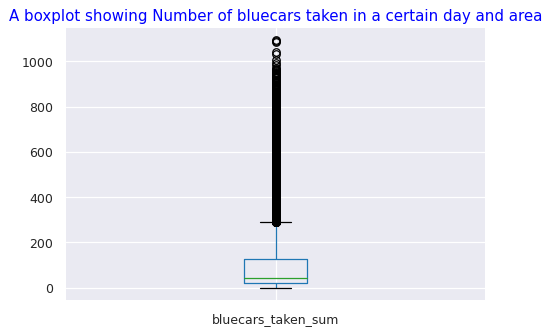

In [ ]:
# Using box plots to check for outliers

# checking for outliers on the variable (bluecars_taken_sum) using boxplot

# Specifying the dots per inch in our chart
# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 90)
df.boxplot(['bluecars_taken_sum'])
plt.title("A boxplot showing Number of bluecars taken in a certain day and area", color = 'blue')
plt.show()


# The boxplot shows profusion of outliers indicated by the black points.
# We will not remove them here.
# we shall investigate them instead.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


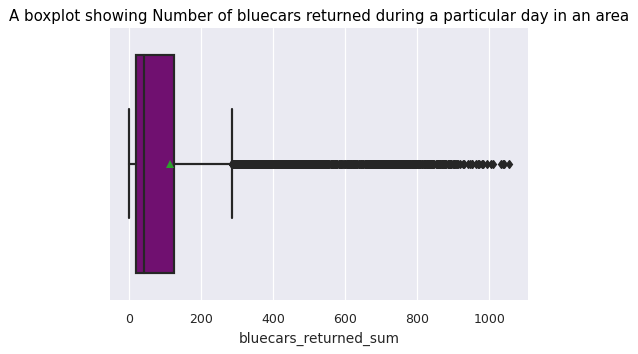

In [ ]:
# Using box plots to check for outliers

# checking for outliers on the bluecars_returned_sum using boxplot

# Chart size specifications
# Using seaborn to create a boxplot
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 90)
sns.boxplot(df['bluecars_returned_sum'], showmeans = True , color = 'purple')
plt.title("A boxplot showing Number of bluecars returned during a particular day in an area", color = 'black')
plt.show()


# The boxplot shows profusion of outliers shown by the black shaded points
# We will not remove them here.
# we shall investigate them instead.


# 1.4 UNIVARIATE ANALYSIS

## 1.4.1 Visualizations

### 1.4.1.1 Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


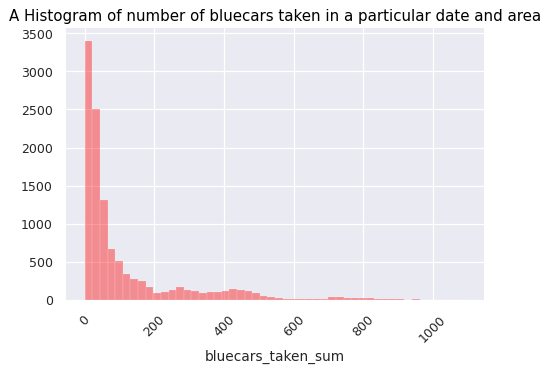

In [ ]:
# Histogram of the bluecars_taken sum

# Using seaborn library to visaulize
# specifying the grid size and style settings
# Giving our chart a title
# Displaying the x axis at a 45 degree angle
# Displaying our chart


plt.figure(dpi = 90)
#sns.set_style("darkgrid")
sns.distplot(df["bluecars_taken_sum"], kde = False, color = 'red')
plt.title("A Histogram of number of bluecars taken in a particular date and area", color = 'black')
plt.xticks(rotation = 45)
plt.show()



# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is long to the right hand side



# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

# When a distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
# and the mean is less than the mode. This situation is also called negative skewness.

# When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# and the mean is greater than the mode. This situation is also called positive skewness.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


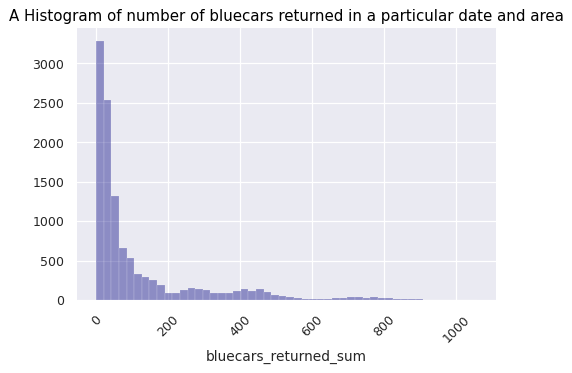

In [ ]:
# Histogram of the bluecars_returned sum

# Using seaborn library to visualize
# specifying the grid size and style settings
# Giving our chart a title
# Displaying the x axis at a 45 degree angle
# Displaying our chart


plt.figure(dpi = 90)
sns.set_style("darkgrid")
sns.distplot(df["bluecars_returned_sum"], kde = False, color = 'navy')
plt.title("A Histogram of number of bluecars returned in a particular date and area", color = 'black')
plt.xticks(rotation = 45)
plt.show()


# the histogram shows us that the blue cars returned distribution is skewed to the right
# this is because the tail is long to the right side

### 1.4.1.2 Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


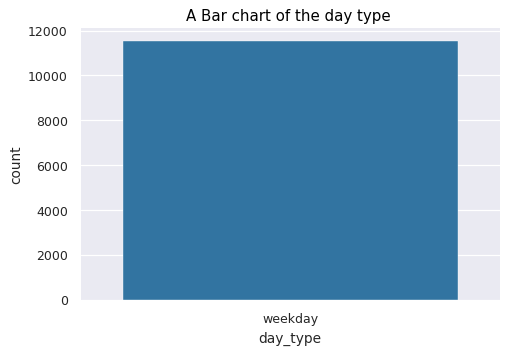

In [ ]:
#  Plotting a bar plot of day_type	variable 
# NOTE: I used the original dataset to show the comparison between weekdays and weekends frequencies.

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 90)
sns.set_style('darkgrid')
sns.countplot(df.day_type)
plt.title('A Bar chart of the day type ', color = 'black')
plt.show()


# The bar chart shows that blue cars usage is more during weekdays than during the weekend.

In [ ]:
# Converting the day of week from from numericals to strings for plotting
# Using the mapping function
# 

df['dayofweek'] = df.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Confirming that our dataset day_type columns was successfully converted to categories

df.tail()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
16078,95880,6/13/2018,1440,Wednesday,weekday,12,13,0,0
16079,95880,6/14/2018,1439,Thursday,weekday,15,13,0,0
16080,95880,6/15/2018,1440,Friday,weekday,15,10,0,0
16083,95880,6/18/2018,1440,Monday,weekday,11,14,0,0
16084,95880,6/19/2018,1370,Tuesday,weekday,2,2,0,0


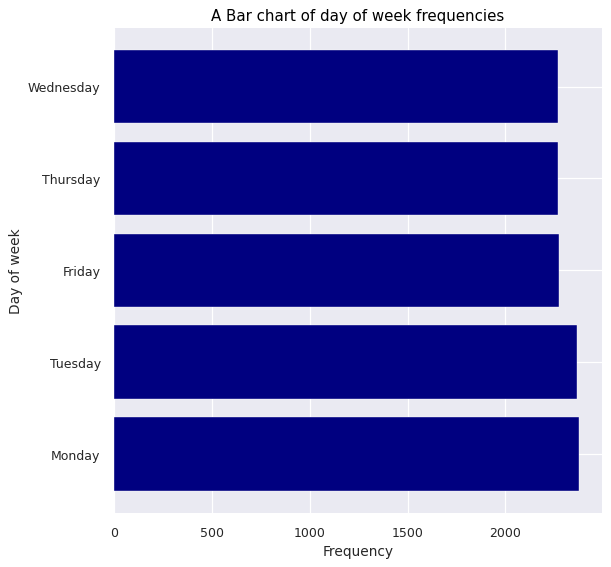

In [ ]:
# # Plotting a horizontal bar plot of the day of week categories 

# grouping the data to be plotted

day = df.dayofweek.value_counts()
day

# accessing the data to plot

# labels
sizes= day.index
sizes

# values
data = day.values
data

# Using matplotlib to create a bar chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 90)
plt.barh(sizes, data, color = 'navy')
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Bar chart of day of week frequencies", color = 'black')
plt.show()

# from the horizontal bar chart, most activities involving picking, returning, and charging blues cars took place of Monday and Tuesday
# We shall check these activities this in a more defined way in our bivariate analysis.
# Also, lets see how a pie charts represents this information in the next step


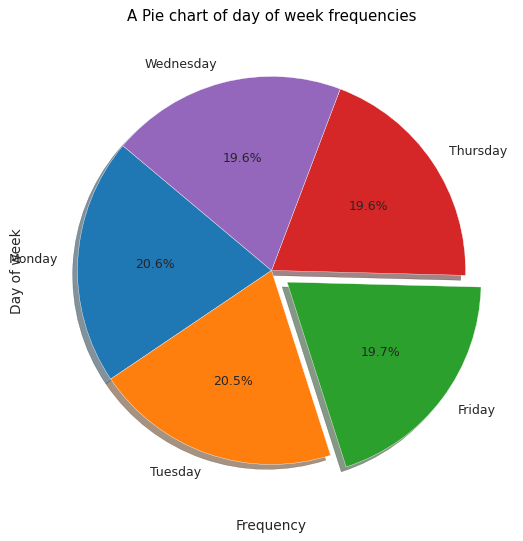

In [ ]:
# # Plotting a Pie chart of the day of week categories 

# grouping the data to be plotted

day2 = df.dayofweek.value_counts()
day2

# accessing the data to plot

# labels
sizes2= day.index
sizes2

# values
data2 = day.values
data2

# Using matplotlib to create a pie chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 90)
plt.pie(data2, labels = sizes2, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies", color = 'black')
plt.show()


# just like in the horizontal bar chart the activities (taking, returning, and charging) surrounding blue cars seem to be 
# equally the same throughout the week except
# on Mondays and Tuesdays where the seems to be slightly more activities compared to other days.

## 1.4.2 Frequency tables

In [ ]:
# Frequency table of number of daily data points that were available for aggregation, that day 

# Making a crosstab
# Naming the count column

s = pd.crosstab(index = df['n_daily_data_points'], columns = 'count')
s

# 1440 was the most frequent number of daily data points that were available for aggregation in most days

col_0,count
n_daily_data_points,
1174,104
1203,103
1320,103
1364,103
1370,94
1377,102
1389,103
1398,104
1411,104


In [ ]:
# Frequency tables showing two or more variables 

# This is more of a bivariate analysis but it the best way to present the below tables,

# To provide better insights

In [ ]:
# Frequency table of charging slots freed/released vs slots taken by day of the week


df.groupby('dayofweek')[['slots_freed_sum', 'slots_taken_sum']].count()


# From the table the number of charging slots freed vs the slots taken is equal
# 

,slots_freed_sum,slots_taken_sum
dayofweek,,
Friday,2271,2271
Monday,2374,2374
Thursday,2268,2268
Tuesday,2363,2363
Wednesday,2268,2268


In [ ]:
# Frequency table showing sums of bluecars taken vs bluecars returned by day of week

df.groupby('dayofweek')[['bluecars_taken_sum' ,'bluecars_returned_sum']].sum()


# the sums are different
# this means that not all cars taken in day are returned the same day


,bluecars_taken_sum,bluecars_returned_sum
dayofweek,,
Friday,288546,286029
Monday,263893,264808
Thursday,263207,262961
Tuesday,261940,260470
Wednesday,261849,260673


In [ ]:
# Frequency table showing sum of bluecars taken by day of week in ascending order.

df.groupby('dayofweek')['bluecars_taken_sum'].sum().sort_values()



# Friday was when most blue cars were taken.
# while Wednesday was when the least number of blue cars were taken.

dayofweek
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: bluecars_taken_sum, dtype: int64

In [ ]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

df.groupby('dayofweek')['bluecars_returned_sum'].sum().sort_values()



# Friday was when most blue cars were returned.
# while Tuesday was when the least number of blue cars were returned.

dayofweek
Tuesday      260470
Wednesday    260673
Thursday     262961
Monday       264808
Friday       286029
Name: bluecars_returned_sum, dtype: int64

In [ ]:
# Frequency table showing sum of charging slots released by day of week in ascending order.

df.groupby('dayofweek')['slots_freed_sum'].sum().sort_values()



# Friday was when most blue cars were released from charging slots.
# while Monday was when the least number of blue cars were released from charging slots.

dayofweek
Monday       47022
Tuesday      47095
Wednesday    47331
Thursday     48200
Friday       52143
Name: slots_freed_sum, dtype: int64

In [ ]:
# Frequency table showing sum of charging slots taken by day of week in ascending order.

df.groupby('dayofweek')['slots_taken_sum'].sum().sort_values()


# Friday was when most blue cars were taken to charge slots for charging.
# while Tuesday was when the least number of blue cars were taken to charge.

dayofweek
Tuesday      46969
Monday       47068
Wednesday    47223
Thursday     48023
Friday       52234
Name: slots_taken_sum, dtype: int64

In [ ]:
# Frequency table of postal codes 
# In ascending order
#

df.postalcode.value_counts().sort_values()


# There are quite a number of postal codes with the most number of times used.

# the least used postal code is 93390.

93390     59
93200     90
93370    105
92340    105
93150    107
        ... 
75012    112
75004    112
78150    112
93700    112
94160    112
Name: postalcode, Length: 104, dtype: int64

## 1.4.3 Measures of Central Tendency

In [ ]:
# MEAN
# Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. 


In [ ]:
# Here we  will use for loops to make our work easier.
# Calculating mean of the target columns defined below.
# Defining our loop
# Specifying a space between each column's output
# Displaying the mean by column

cols = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The mean ' + column + ' is : ' + str(df[column].mean()))


  
  # The output below shows the mean/average of each of the target column/variable.
  # we can see that the average number of bluecars taken vs returned are nearly the same and 
  # the mean of freed slots vs taken charging slots.
  



The mean n_daily_data_points is : 1430.0072765072764


The mean bluecars_taken_sum is : 116.0286729036729


The mean bluecars_returned_sum is : 115.63937976437977


The mean slots_freed_sum is : 20.94516632016632


The mean slots_taken_sum is : 20.921431046431046


In [ ]:
## MODE
# Mode is the term appearing maximum time in a given data set.
# It is the term that has highest frequency.

In [ ]:
# Using for loops to find each variable's mode
# Defining our loop
# Specifying a space between each column's output
# Displaying the mode by column


for column in cols:
  print('\n')
  print('The Mode of ' + column + ' is ; ' + str(df[column].mode()))
  
  
# The output below shows the mode of each of the variables of interest.
# the mode for bluecars returned vs taken is the same as well as the mode for the charging slots freed and taken.



The Mode of n_daily_data_points is ; 0    1440
dtype: int64


The Mode of bluecars_taken_sum is ; 0    12
dtype: int64


The Mode of bluecars_returned_sum is ; 0    12
dtype: int64


The Mode of slots_freed_sum is ; 0    0
dtype: int64


The Mode of slots_taken_sum is ; 0    0
dtype: int64


In [ ]:
# Median
# Median is the value which divides the data in 2 equal parts;
# Number of terms on right side of it, is same as number of terms on left side of it when data is arranged in either ascending or descending order.

In [ ]:
# Using for loops to find each variable's median
# Defining our loop
# Specifying a space between each column's output
# Displaying the median by column


for column in cols:
  print('\n')
  print('The median of ' + column + ' is ; ' + str(df[column].median()))
  
  
# the output indicates the median value of each variable defined in our columns of interest.
# the median for bluecars returned vs taken is the same as well as the median for the charging slots freed and taken.



The median of n_daily_data_points is ; 1440.0


The median of bluecars_taken_sum is ; 42.0


The median of bluecars_returned_sum is ; 42.0


The median of slots_freed_sum is ; 0.0


The median of slots_taken_sum is ; 0.0


## 1.4.4 Measures of Dispersion/Spread/Variability

In [ ]:
# RANGE

# It is the difference between lowest and highest value
# find maximum value 
# find minimum value
# range = max - min

In [ ]:
# Using functions to find range for each target column
# Defining our function and parameters
# Calculating the maximum value
# Calculating the minimum value
# Calculating the range
# specify the return value as each column's range
# 

# Incorporating a for loop to calculate range over all the target columns
# Specifying spacing between each output
# Printing the the output as each column's range


def column_range(column):            
  max_value = df[column].max()             
  min_value = df[column].min()              
  col_range = max_value - min_value        
  return col_range                   

for column in cols:                              
  print('\n')                                                 
  print('The '+ column + ' range is: ' + str(column_range(column))) 
  
  
  
  
# The output shows the range for each column of interest here.



The n_daily_data_points range is: 266


The bluecars_taken_sum range is: 1093


The bluecars_returned_sum range is: 1056


The slots_freed_sum range is: 288


The slots_taken_sum range is: 294


In [ ]:
## INTERQUARTILE RANGE

# QUANTILES

# Quartiles are values that divide the data into quarters when data is sorted in an ascending order.

# There are three quartile values. 

# Q1: First quartile is the 25 percentile. 
# Q2: Second quartile is the 50 percentile...also...median of the data
# Q3: Third quartile is the 75 percentile. 


# THE INTERQUARTILE RANGE ...also ..IQR

# IQR = Q3 -Q1

In [ ]:
# Calculating the quartiles of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Quantiles by column in cols list


for column in cols:
  print('\n')
  print(df[column].quantile([0.25, 0.5, 0.75]))
  
  
  
# The output indicates the first, second, and third quartiles for each column



0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64


0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64


0.25     19.0
0.50     42.0
0.75    126.0
Name: bluecars_returned_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    4.0
Name: slots_freed_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64


In [ ]:

# STANDARD DEVIATION

# Average distance between each obseravtion from the mean. 
# I.e., how data is spread out from mean. 
# A low std dev indicates that the data points tend to be close to the mean of the data set, 
# A high std dev indicates that the data points are spread out over a wider range of values.

In [ ]:
# Calculating the Standard Deviation of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Standard Deviation by column in cols list

for column in cols:
  print('\n')
  print('The Standard Deviation of ' + column + ', is :  ' + str(df[column].std()))
  
  
  
  
  
  ### The output shows the standard deviation for each target column.
  
  
  
### Comparing each column means with the standard deviation to see how the data is spread out:

  
  
# The mean n_daily_data_points is : 1430.0072765072764   ### Std Dev = 36.88213992449968  # data points tend to be close to the mean of the data set,


# The mean bluecars_taken_sum is : 116.0286729036729   ### Std Dev = 169.62690469970084   #  the data points are spread out over a wider range of values


# The mean bluecars_returned_sum is : 115.63937976437977   ### Std Dev = 168.34475125432746    #  the data points are spread out over a wider range of values


# The mean slots_freed_sum is : 20.94516632016632   ### Std Dev = 47.90020768290576    #  the data points are spread out over a wider range of values


# The mean slots_taken_sum is : 20.921431046431046     ### Std Dev = 47.84857983852817    #  the data points are spread out over a wider range of values
 



The Standard Deviation of n_daily_data_points, is :  36.88213992449968


The Standard Deviation of bluecars_taken_sum, is :  169.62690469970084


The Standard Deviation of bluecars_returned_sum, is :  168.34475125432746


The Standard Deviation of slots_freed_sum, is :  47.90020768290576


The Standard Deviation of slots_taken_sum, is :  47.84857983852817


In [ ]:
## VARIANCE 

# It is the square of average distance between each observation and mean. 
# I.e. square of standard deviation. 
# It is a measure of how dispersed or spread out the set is, 

# If a data set has a variance of zero, then every member of it is the same. 
# If the variance is high, especially as a ratio to the mean, then the data have some very large dis-similarities amongst its members.

In [ ]:
# Calculating the variance of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the variance by column in cols list


for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(df[column].var()))
  
  
  # From the outputs, all the variables have a  very high variance indicating that
  # the data in each column have some very large dis-similarities amongst its members.
  # except for n_daily data points which has a fairly smaller value compared to others.



The Variance of n_daily_data_points, is :  1360.2922454103737


The Variance of bluecars_taken_sum, is :  28773.286798001394


The Variance of bluecars_returned_sum, is :  28339.955274881388


The Variance of slots_freed_sum, is :  2294.4298960655037


The Variance of slots_taken_sum, is :  2289.4865925640042


In [ ]:
## SKEWNESS 

# A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.
# A negative value means the distribution is negatively skewed.....or...skewed to the left
# A positive value means the distribution is positively skewed.....or...skewed to the right

In [ ]:
# Calculating the Skewness of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Skewness by column in cols list


for column in cols:
  print('\n')
  print('The Skewness of ' + column + ', is :  ' + str(df[column].skew()))
  
  
  
# from the output, n_daily_data_points data distribution is skewed to the left since it has a negative value
# Others: bluecars_taken_sum, bluecars_returned_sum, slots_freed_sum,  and  slots_taken_sum have a positive value indicating that
# they data distributions are skewed to the right.
# this was also evident in the histograms plotted above.



The Skewness of n_daily_data_points, is :  -5.449575600011862


The Skewness of bluecars_taken_sum, is :  2.3281979815185876


The Skewness of bluecars_returned_sum, is :  2.3289726516394973


The Skewness of slots_freed_sum, is :  2.5421869688795278


The Skewness of slots_taken_sum, is :  2.5423463886866187


In [ ]:
# KURTOSIS 

# A measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.
# If the kurtosis is close to 0, then a normal distribution is often assumed....These are called mesokurtic distributions.                        
# If the kurtosis is less than zero, then the distribution has light tails ......called a platykurtic distribution.  
# If the kurtosis is greater than zero, then the distribution has heavier tails .... called a leptokurtic distribution.

In [ ]:
# Calculating the Kurtosis of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Kurtosis by column in cols list


for column in cols:
  print('\n')
  print('The Kurtosis of ' + column + ', is :  ' + str(df[column].kurt()))

 # The kurtosis value in all the columns are greater than zero, 
# Therefore their distributions have heavier tails .... called a leptokurtic distributions
# they all have a profusion of outliers
# Just like we saw in the boxplots earlier.



The Kurtosis of n_daily_data_points, is :  31.654407529009344


The Kurtosis of bluecars_taken_sum, is :  5.553808116768028


The Kurtosis of bluecars_returned_sum, is :  5.5428632223425325


The Kurtosis of slots_freed_sum, is :  6.007229901401457


The Kurtosis of slots_taken_sum, is :  6.001264705133703


# 1.5 BIVARIATE ANALYSIS

In [ ]:
# Analysis of two different variables to find their causes and relationships between them.

## 1.5.1 Visualizations

### 1.5.1.1 Scatter Plots

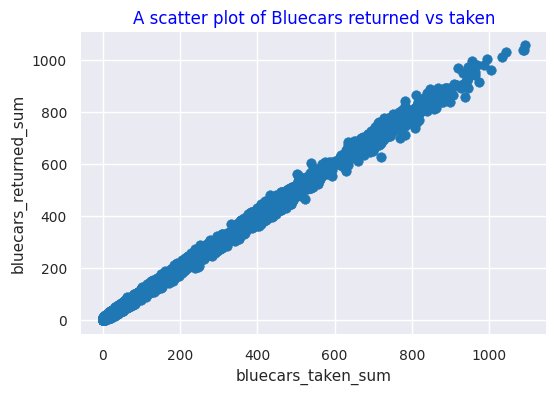

In [ ]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables

# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(df['bluecars_taken_sum'], df['bluecars_returned_sum'])

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars returned vs taken', color = 'blue')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()




# There is strong positive correlation between Bluecars returned vs taken.
# As the blue cars taken increases, the bluecar returned also increases.
# 

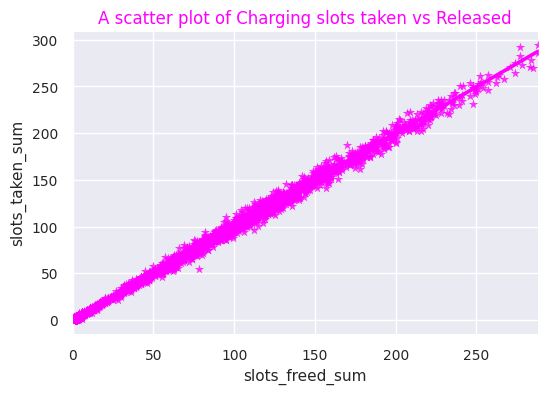

In [ ]:
# Using Seaborn: 

# Specifying the dots per inch
# Using the function regplot from Seaborn to create our scatterplot
# creating a title for our scatter plot
# displaying the scatter plot


plt.figure(dpi = 100)
sns.regplot(x = df["slots_freed_sum"], y = df["slots_taken_sum"], fit_reg=True, color = 'magenta', marker = '*')
plt.title("A scatter plot of Charging slots taken vs Released", color = 'magenta')
plt.show()



# There is strong positive correlation between charging slots taken vs released.
# As the charging slots are released increases, the taken charging also increases.
# 

### 1.5.1.2 Line Charts

In [ ]:
# To plot a meaningful line chart,
# I will use simple random sampling techinique to select a representative sample of the data
# Since there are too many observations to plot a line chart.


# then I will use stratified sampling to select a sample dataset for by each month.


# then I will plot a line chart and a stacked bar chart

# **SIMPLE RANDOM SAMPLING**

In [ ]:
# A simple random sample is a subset of a statistical population 
# in which each member of the subset has an equal probability of being chosen. 
# A simple random sample is meant to be an unbiased representation of a group.

# Major advantages include its simplicity and lack of bias.


In [ ]:
# creating a new dataframe containing our simple random sample 
# sample size = 3000
# the sample will be selected without replacement


df1 = df.sample(n = 3000, replace = 'False')


In [ ]:
# Confriming the size of our sample
# viewing the head of the created sample


print(df1.shape)

df1.head()



(3000, 9)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
12857,93800,2/16/2018,1439,Friday,weekday,12,11,0,0
5058,92130,3/14/2018,1440,Wednesday,weekday,263,263,8,8
3077,75020,4/27/2018,1440,Friday,weekday,420,415,106,100
7634,92310,6/13/2018,1440,Wednesday,weekday,71,82,0,0
5070,92130,3/26/2018,1439,Monday,weekday,237,224,1,1


In [ ]:
## converting the date column to datetime format 
#  We will extract the month for plotting purposes

df1['date'] = pd.to_datetime(df1.date)

# **STRATIFIED SAMPLING**

In [ ]:
# Stratified Sampling
# Stratified sampling refers to a type of sampling method. 
# With stratified sampling, the researcher divides the population into separate groups, called strata. 
# Then, a probability sample (often a simple random sample ) is drawn from each group.

# Stratified sampling has several advantages over simple random sampling. 
# For example, using stratified sampling, 
# it may be possible to reduce the sample size required to achieve a given precision. 
# Or it may be possible to increase the precision with the same sample size.

In [ ]:
# creating a new column called month
# we shall use the column month to select our stratifies sample by each month

df1['month'] = pd.DatetimeIndex(df1['date']).month  

In [ ]:
# checking the new column created

df1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
12857,93800,2018-02-16,1439,Friday,weekday,12,11,0,0,2
5058,92130,2018-03-14,1440,Wednesday,weekday,263,263,8,8,3
3077,75020,2018-04-27,1440,Friday,weekday,420,415,106,100,4
7634,92310,2018-06-13,1440,Wednesday,weekday,71,82,0,0,6
5070,92130,2018-03-26,1439,Monday,weekday,237,224,1,1,3


In [ ]:
# Selecting a stratified sample 
# By month of the year.

strat_sample = df1.groupby(['month'],group_keys = False).apply(lambda month : month.sample(frac = 0.5))



In [ ]:
# checking the new stratified sample selected

print(strat_sample.shape)

strat_sample.head()

(1500, 10)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
1264,75009,2018-01-17,1440,Wednesday,weekday,322,308,82,83,1
1433,75010,2018-01-30,1440,Tuesday,weekday,261,263,68,71,1
1738,75012,2018-01-23,1439,Tuesday,weekday,411,413,124,125,1
6407,92230,2018-01-15,1440,Monday,weekday,71,64,1,0,1
12996,94000,2018-01-30,1440,Tuesday,weekday,98,100,0,0,1


### 1.5.1.3 Pearson correlation

In [ ]:
# Correlation


# It is a statistical measure that describes the association between random variables.

# Calculate the pearson correlation coefficient; It is the most widely used correlation coefficient.

# Positive correlation is a relationship between two variables in which both variables move in tandem i.e. in the same direction.

# Negative correlation/ inverse correlation is a relationship between two variables whereby they move in opposite directions. 

# Correlation coefficients between -.20 and .20 are generally considered weak, 

# Between .20 and .50 (positive or negative) are considered moderate, 

# Above.50 (positive or negative) are considered strong.

In [ ]:
# Calculating the pearson coefficient of the entire dataframe

df.corr()

,postalcode,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
postalcode,1.000000,0.000174,-0.701709,-0.701877,-0.754730,-0.754422
n_daily_data_points,0.000174,1.000000,0.026295,0.026691,0.020497,0.021045
bluecars_taken_sum,-0.701709,0.026295,1.000000,0.998780,0.945700,0.944855
bluecars_returned_sum,-0.701877,0.026691,0.998780,1.000000,0.945758,0.946006
slots_freed_sum,-0.754730,0.020497,0.945700,0.945758,1.000000,0.999154
slots_taken_sum,-0.754422,0.021045,0.944855,0.946006,0.999154,1.000000


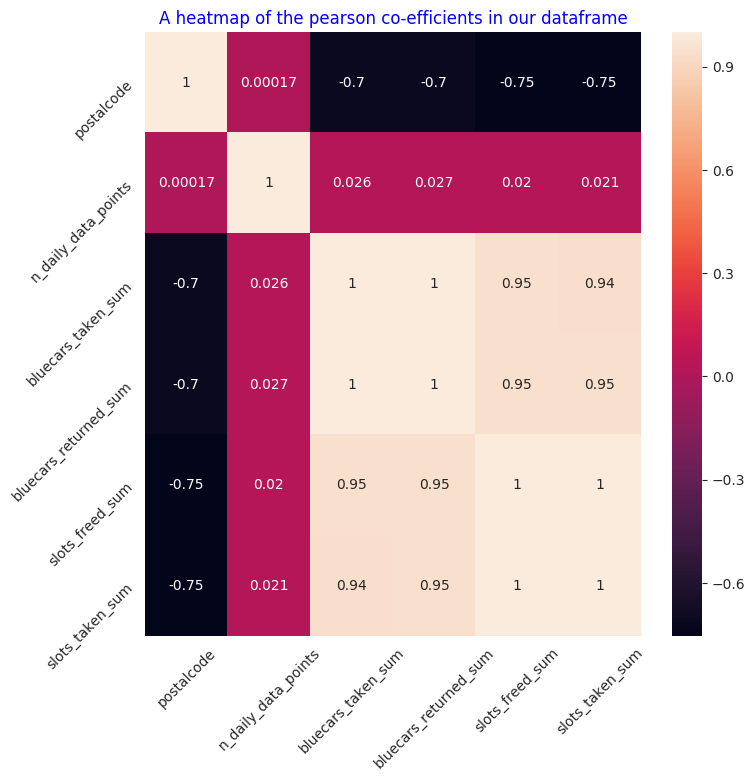

In [ ]:
# Heatmap


# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart


x = df.corr()
plt.figure(figsize = (8,8), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "blue")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()



# The brighter regions show strong positive correlation between variables.
# For example there is a strong positive correlation (0.99) between bluecars_taken_sum and bluecars_returned_sum, &	slots_freed_sum and slots_taken_sum

# 1.6 HYPOTHESIS TESTING 

In [ ]:
# Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. 
# Hypothesis Testing is basically an assumption that we make about the population parameter.

#### DEFINITION OF TERMS

# Null hypothesis Ho:- In inferential statistics, the null hypothesis is a general statement or
# default position that there is no relationship between two measured phenomena, or no association among groups.
# In other words it is a basic assumption or made based on domain or problem knowledge.


# Alternative hypothesis Ha/H1:-
# The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis.
# It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed)


# Level of significance:
# Refers to the degree of significance in which we accept or reject the null-hypothesis. 
# 100% accuracy is not possible for accepting or rejecting a hypothesis, 
# so we therefore select a level of significance that is usually 5%.
# This is normally denoted with alpha(maths symbol ) and generally it is 0.05 or 5% , 
# which means your output should be 95% confident to give similar kind of result in each sample.


# Type I error: 
# When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha.


# Type II errors: 
# When we accept the null hypothesis but it is false. Type II errors are denoted by beta. 

# One tailed test :-
# A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution
# It can be right or left tail; determined by the alternative hypothesis

# Two-tailed test :- 
# A two-tailed test is a statistical test in which the critical area of a distribution is two-sided 


# P-value :- 
# The P value, or calculated probability, 
# is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true
# If your P value is less than the chosen significance level then you reject the null hypothesis i.e. 
# accept that your sample gives reasonable evidence to support the alternative hypothesis. 


In [ ]:
# T- Test :-
# A t-test is a type of inferential statistic which is used to
# determine if there is a significant difference between the means of two groups which may be related in certain features.
# T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

# Two sampled T-test :-The Independent Samples t Test or 2-sample t-test 
# compares the means of two independent groups in order to 
# determine whether there is statistical evidence that the associated population means are significantly different. 
# The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

# Paired sampled t-test :- 
# The paired sample t-test is also called dependent sample t-test.
# It’s a univariate test that tests for a significant difference between 2 related variables.

In [ ]:
# Z Test.

## When to use Z test

# Your sample size is greater than 30. Otherwise, use a t test.

# Data points should be independent from each other. i.e, one data point isn’t related or doesn’t affect another data point.

# Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.

# Your data should be randomly selected from a population, where each item has an equal chance of being selected.

# Sample sizes should be equal if at all possible.



In [ ]:
# Using a Z test to conduct our Hypothesis.
# It is the appropriate test to use here since we have a dataset larger than 30 observations.
# 

In [ ]:
# Selecting two postal codes using simple random sampling

h_sample = df.sample(n = 2, replace = False)
h_sample

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1737,75012,1/22/2018,1440,Monday,weekday,415,418,138,141
934,75006,6/18/2018,1440,Monday,weekday,225,226,40,40


In [ ]:
# STEP 1

# Stating the Hypothesis


# H0 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is 0
# H1 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is not 0


## OR


# H0 : U1 = U2
# Ha : U1 ≠ U2

In [ ]:
# STEP 2

# Level of significance
# α = 0.05


In [ ]:
# Creating a dataframe containing the 75012 postal code as p1

p1 = df[df['postalcode'] == 75012]
p1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1716,75012,1/1/2018,1440,Monday,weekday,502,512,122,120
1717,75012,1/2/2018,1438,Tuesday,weekday,406,412,109,109
1718,75012,1/3/2018,1439,Wednesday,weekday,427,423,92,95
1719,75012,1/4/2018,1320,Thursday,weekday,395,392,91,94
1720,75012,1/5/2018,1440,Friday,weekday,476,478,114,118


In [ ]:
# Creating a dataframe containing the 75006 postal code as p2

p2 = df[df['postalcode'] == 75006]
p2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
780,75006,1/1/2018,1440,Monday,weekday,215,197,34,31
781,75006,1/2/2018,1438,Tuesday,weekday,190,192,34,38
782,75006,1/3/2018,1439,Wednesday,weekday,208,207,30,25
783,75006,1/4/2018,1320,Thursday,weekday,176,179,32,30
784,75006,1/5/2018,1440,Friday,weekday,262,261,49,45


In [ ]:
# # STEP 3

# Calculating the test statistic
# Applying the conditions for an appropriate decision.

ztest , pval1 = stests.ztest(p1['bluecars_taken_sum'], x2= p2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.571771542382906e-172
reject null hypothesis


In [ ]:
# STEP 4 

# Evaluating our results

# The p-value = 3.571771542382906e-172

# this p-value is a very small value and it is less that the level of significance (0.05)

# Hence we Reject the Null Hypothesis



In [ ]:
# STEP 5

# Interpreting the results

# There is sufficient evidence to conclude that the difference in the means of blue cars taken in postal code 75012 and 75006 is not 0.

# The test was statistically significant.